# 1. Visualising sample images and annotations 

In [8]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path
import os

In [9]:
plt.rcParams["savefig.bbox"] = 'tight'

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False, figsize=(num_images*5,num_images*5))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [14]:
# loading annotations data
data = pd.read_csv("../BC_preprocessing/annotations.csv")
df = pd.DataFrame(data)
df.head()

,image,xmin,ymin,xmax,ymax,label
0,image-100.png,0.000000,0.000000,25.190198,40.816803,rbc
1,image-100.png,15.010502,0.000000,68.337223,23.527421,rbc
2,image-100.png,25.017503,16.021004,78.374562,73.735123,rbc
3,image-100.png,75.565928,1.061844,140.248541,45.591599,rbc
4,image-100.png,77.483081,23.290548,131.936989,74.806301,rbc


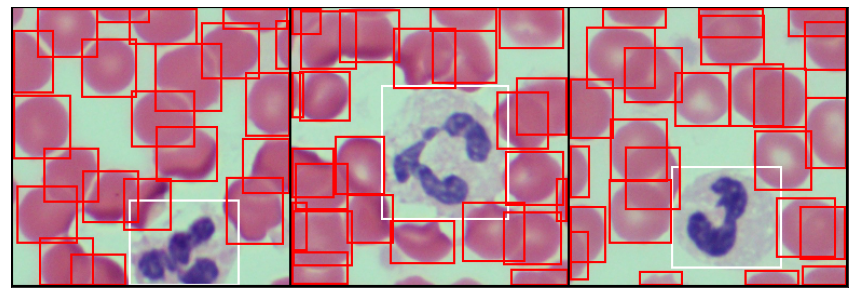

In [16]:
image_path = "../BC_preprocessing/images/"
file_list = []

# get a list of all the images in the file
for x in os.listdir(image_path):
    if x.endswith(".png"):
        file_list.append(x)

# Change num_images if you want to see more
num_images = 3
counter = 0
cell_dict = {}
anno_dict = {}

# showing the first (num_images) images
for file in file_list[:num_images]:
    counter +=1
    
    # update cell dictionary
    cell_dict[file] = read_image(image_path + file)
    
    # update annotations dictionary
    cell = df[df["image"]==file]
    cell_list = cell[["xmin", "ymin", "xmax", "ymax"]].values.tolist()
    cell_labels = cell["label"].values.tolist()
    cell_labels = ["red" if cell=="rbc" else "white" for cell in cell_labels]
    cell_list.append(cell_labels)
    
    anno_dict[file] = cell_list

from torchvision.utils import draw_bounding_boxes

result_dict = {}

# Visualising images and annotations
for i in range(num_images):
    boxes = torch.tensor(anno_dict[file_list[i]][:-1], dtype=torch.float)
    colors = anno_dict[file_list[i]][-1]
    result = draw_bounding_boxes(cell_dict[file_list[i]][:-1], boxes, colors=colors, width=2)
    result_dict[i] = result

grid = make_grid([result_dict[x] for x in result_dict])
show(grid)

# 2. Implementing YOLOv5

In [7]:
# Setup YOLOv5
# !git clone https://github.com/ultralytics/yolov5  # clone
# %cd yolov5
# %pip install -qr requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 10800, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 10800 (delta 0), reused 0 (delta 0), pack-reused 10799
Receiving objects: 100% (10800/10800), 10.85 MiB | 18.99 MiB/s, done.
Resolving deltas: 100% (7468/7468), done.
/Users/thesuperchee/Documents/YOLO/yolov5
Note: you may need to restart the kernel to use updated packages.


In [17]:
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.0-225-gb73c62e torch 1.10.2 CPU


Setup complete ✅ (8 CPUs, 32.0 GB RAM, 102.0/926.4 GB disk)


In [25]:
### Train YOLOv5 model
!python train.py --img 256 --batch 3 --epochs 100 --data "/Users/thesuperchee/Documents/YOLO/yolov5/data/internship_assignment.yaml" --weights yolov5x.pt --cache

train: weights=yolov5s.pt, cfg=, data=/Users/thesuperchee/Documents/YOLO/yolov5/data/internship_assignment.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=3, imgsz=256, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-225-gb73c62e torch 1.10.2 CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=

      0/99        0G    0.1219    0.1482    0.0283       107       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      0/99        0G     0.122    0.1481   0.02829       104       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      0/99        0G    0.1218    0.1468   0.02827        96       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      1/99        0G    0.1193    0.1405   0.02736       104       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      1/99        0G    0.1194     0.138   0.02735        94       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      1/99        0G    0.1193    0.1403   0.02736       105       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      2/99        0G    0.1162    0.1568   0.02657       128       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      2/99        0G    0.1161    0.1582   0.02642       109       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      2/99        0G    0.1163    0.1586   0.02635       123       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      3/99        0G    0.1125    0.1372   0.02563        61       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      3/99        0G    0.1125    0.1375   0.02536        89       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      3/99        0G    0.1136      0.17   0.02534       173       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463     0.0481      0.182     0.0333    0.00702

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      4/99        0G    0.1075    0.1365   0.02489        83       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      4/99        0G    0.10

      4/99        0G     0.109    0.1578    0.0239        81       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      4/99        0G    0.1088    0.1572   0.02385        91       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      4/99        0G    0.1087    0.1555   0.02378        27       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.125      0.157     0.0702     0.0147

     Epoch   gpu_m

      5/99        0G    0.1074    0.1768    0.0222       181       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      5/99        0G    0.1071    0.1734   0.02219        62       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      5/99        0G    0.1068    0.1711   0.02214        78       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      6/99        0G    0.1027    0.1359   0.02088        80       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      6/99        0G    0.1027    0.1365   0.02086       104       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      6/99        0G    0.1028    0.1367   0.02086       103       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      7/99        0G     0.102    0.1511   0.01952       116       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      7/99        0G    0.1019    0.1521    0.0195       125       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      7/99        0G    0.1015    0.1508   0.01948        80       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      8/99        0G   0.09861    0.1463   0.01797       113       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      8/99        0G    0.0987    0.1451     0.018       103       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      8/99        0G   0.09915    0.1468   0.01803       163       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

      9/99        0G   0.09739     0.146   0.01697       110       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      9/99        0G   0.09726     0.145   0.01692       106       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
      9/99        0G   0.09698     0.142   0.01693        65       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     10/99        0G   0.09477    0.1336   0.01583        59       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     10/99        0G   0.09426    0.1322   0.01572        82       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     10/99        0G   0.09353    0.1293   0.01567        62       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     11/99        0G   0.09292    0.1424   0.01545       120       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     11/99        0G   0.09243    0.1418   0.01535        96       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     11/99        0G   0.09226      0.14   0.01519       107       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     12/99        0G   0.08761    0.1342   0.01369       123       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     12/99        0G   0.08857    0.1365   0.01385       124       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     12/99        0G   0.08908    0.1352   0.01401       121       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     13/99        0G   0.08655    0.1295   0.01328       114       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     13/99        0G   0.08468    0.1241   0.01309        65       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     13/99        0G   0.08498    0.1205   0.01323        83       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     14/99        0G   0.08006    0.1157   0.01143        77       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     14/99        0G   0.08456    0.1341   0.01196       147       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     14/99        0G   0.08363    0.1282   0.01196        80       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.684      0.327      0.243      0.068

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     15/99        0G   0.07846    0.1238   0.01063        95       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     15/99        0G   0.080

     15/99        0G   0.07768    0.1275   0.01098        73       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     15/99        0G   0.07734    0.1268   0.01092        78       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     15/99        0G    0.0775    0.1285   0.01084        43       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.757      0.283      0.292     0.0862

     Epoch   gpu_m

     16/99        0G   0.07674    0.1332    0.0106        95       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     16/99        0G   0.07683    0.1321   0.01058       102       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     16/99        0G   0.07679    0.1329   0.01059       124       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     17/99        0G   0.07327     0.132  0.009986       109       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     17/99        0G   0.07332     0.132  0.009913       109       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     17/99        0G   0.07334    0.1313  0.009929       102       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     18/99        0G   0.07538    0.1421  0.009658       136       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     18/99        0G   0.07496     0.141  0.009637        94       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     18/99        0G   0.07511    0.1413  0.009576       126       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     19/99        0G   0.07428     0.132  0.008762        86       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     19/99        0G   0.07374    0.1301  0.008706        75       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     19/99        0G   0.07368    0.1305  0.008829       130       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     20/99        0G   0.07038    0.1274  0.008494        77       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     20/99        0G   0.07053    0.1275  0.008665       118       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     20/99        0G    0.0713    0.1323  0.008779       171       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     21/99        0G   0.06907    0.1324  0.008664       115       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     21/99        0G   0.06931    0.1352  0.008644       156       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     21/99        0G   0.06923    0.1346  0.008891       115       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     22/99        0G   0.07428    0.1303  0.008315       126       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     22/99        0G   0.07371    0.1323  0.008382       128       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     22/99        0G    0.0724    0.1302  0.008426        77       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     23/99        0G   0.07623    0.1441   0.00797        84       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     23/99        0G   0.07602     0.144  0.007787       114       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     23/99        0G   0.07499    0.1419  0.007955       111       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     24/99        0G   0.08062    0.1296  0.006634        93       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     24/99        0G   0.08099    0.1319  0.007308       114       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     24/99        0G   0.08146    0.1333  0.007842       127       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     25/99        0G   0.07341     0.146  0.007937       117       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     25/99        0G   0.07215    0.1335  0.007142        76       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     25/99        0G   0.07143    0.1245  0.007449        69       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463       0.41      0.874      0.577      0.139

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     26/99        0G   0.06451     0.113   0.00504        81       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     26/99        0G    0.07

     26/99        0G   0.07695    0.1238  0.006916       117       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     26/99        0G   0.07716    0.1238  0.007006        94       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     26/99        0G   0.07732    0.1238   0.00693        32       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.331      0.796      0.496      0.106

     Epoch   gpu_m

     27/99        0G   0.08081    0.1186  0.007494        44       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     27/99        0G   0.08029    0.1182  0.007437        85       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     27/99        0G   0.07984    0.1199  0.007443       123       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     28/99        0G   0.07183    0.1351  0.006985       111       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     28/99        0G   0.07213    0.1369  0.007003       138       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     28/99        0G    0.0721    0.1369  0.007001       117       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     29/99        0G   0.07502    0.1309  0.006392        73       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     29/99        0G   0.07497    0.1307  0.006419       102       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     29/99        0G   0.07483    0.1311  0.006388       105       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     30/99        0G   0.07211    0.1302   0.00654        94       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     30/99        0G   0.07248    0.1344  0.006695       174       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     30/99        0G   0.07147    0.1333  0.006759        77       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     31/99        0G   0.06377    0.1341  0.006258       103       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     31/99        0G   0.06348    0.1345  0.006273        93       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     31/99        0G   0.06304    0.1342  0.006343        88       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     32/99        0G   0.08083    0.1243  0.005963       114       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     32/99        0G   0.08063    0.1227  0.005865        86       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     32/99        0G   0.08017    0.1211  0.005857        67       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     33/99        0G    0.0766    0.1262  0.005679        88       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     33/99        0G   0.07665    0.1256  0.005643       105       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     33/99        0G    0.0761    0.1242  0.005598        90       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     34/99        0G   0.08974    0.1188  0.006586       111       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     34/99        0G   0.08964    0.1218  0.006491       127       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     34/99        0G   0.08999    0.1231   0.00665       130       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     35/99        0G   0.08009    0.1146  0.006681       133       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     35/99        0G   0.08121    0.1173  0.006327       123       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     35/99        0G   0.08229     0.119   0.00638       135       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     36/99        0G   0.07773    0.1287  0.005959        97       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     36/99        0G   0.07738    0.1297  0.005576       115       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     36/99        0G   0.07531    0.1287  0.005636        95       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463       0.74      0.627       0.74      0.237

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     37/99        0G   0.08424    0.1024  0.004064        92       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     37/99        0G   0.086

     37/99        0G   0.08233    0.1042  0.005109        64       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     37/99        0G   0.08234    0.1055  0.005059       129       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     37/99        0G   0.08182    0.1051  0.005282        23       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.432       0.81      0.603      0.198

     Epoch   gpu_m

     38/99        0G   0.07715    0.1287  0.005584        90       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     38/99        0G   0.07689    0.1271  0.005513        70       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     38/99        0G   0.07666    0.1256  0.005471        78       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     39/99        0G   0.06979      0.11  0.004703        79       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     39/99        0G   0.06984    0.1105  0.004666       126       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     39/99        0G    0.0696    0.1104  0.004678        93       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     40/99        0G    0.0629    0.1014   0.00492        75       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     40/99        0G   0.06317    0.1032  0.004978       129       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     40/99        0G   0.06314    0.1029  0.004964        92       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     41/99        0G   0.06497    0.1081  0.004751        82       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     41/99        0G   0.06472    0.1077  0.004645        90       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     41/99        0G   0.06463    0.1075  0.004566       102       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     42/99        0G   0.07751    0.1187  0.004383       140       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     42/99        0G   0.07728    0.1164  0.004417        75       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     42/99        0G   0.07739    0.1161   0.00436       112       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     43/99        0G    0.1007    0.1222  0.004374       155       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     43/99        0G    0.1005    0.1196  0.004303        85       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     43/99        0G    0.1003    0.1184  0.004335       107       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     44/99        0G    0.0851     0.132  0.004801       110       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     44/99        0G   0.08459    0.1298  0.004672       106       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     44/99        0G   0.08446    0.1323  0.004776       135       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     45/99        0G   0.07743    0.1183  0.004198       121       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     45/99        0G   0.07683    0.1185  0.004212       103       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     45/99        0G   0.07637    0.1199  0.004482       104       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     46/99        0G   0.07293    0.1072     0.004       106       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     46/99        0G   0.07219    0.1103  0.004089       108       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     46/99        0G   0.07284     0.111  0.004132       128       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     47/99        0G   0.06323    0.1102  0.003909        87       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     47/99        0G    0.0647    0.1085  0.004181        90       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     47/99        0G   0.06639    0.1099  0.004342       126       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.848      0.822      0.914      0.471

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     48/99        0G   0.06584     0.117  0.003649       111       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     48/99        0G   0.065

     48/99        0G   0.06589    0.1199   0.00403       118       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     48/99        0G   0.06567    0.1193  0.004094        85       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     48/99        0G   0.06709    0.1222  0.004295        79       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.713      0.754      0.809      0.302

     Epoch   gpu_m

     49/99        0G   0.06961    0.1098  0.003792       128       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     49/99        0G   0.06965    0.1099  0.003789        99       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     49/99        0G   0.06959    0.1087  0.003747        55       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     50/99        0G   0.07198    0.1222  0.003598        85       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     50/99        0G   0.07156    0.1202  0.003542        77       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     50/99        0G   0.07136    0.1194   0.00351       108       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     51/99        0G   0.06838    0.1128  0.003379        84       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     51/99        0G   0.06847    0.1132  0.003507       136       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     51/99        0G   0.06871    0.1143   0.00353       136       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     52/99        0G   0.06689    0.1072   0.00319        87       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     52/99        0G   0.06621    0.1057  0.003144        70       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     52/99        0G   0.06587     0.106  0.003131       119       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     53/99        0G   0.06218    0.1139  0.003426        83       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     53/99        0G   0.06195    0.1137  0.003416       108       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     53/99        0G    0.0622    0.1153  0.003327       132       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     54/99        0G   0.05874    0.1105  0.003058       117       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     54/99        0G   0.05898    0.1105  0.003035       118       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     54/99        0G   0.05894    0.1117  0.003087       127       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     55/99        0G   0.05569   0.09896  0.002982        84       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     55/99        0G   0.05585   0.09943  0.002895        98       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     55/99        0G   0.05654    0.1022  0.002864       130       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     56/99        0G   0.06273    0.1123  0.003135       130       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     56/99        0G   0.06414    0.1196  0.003212       167       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     56/99        0G   0.06422    0.1187  0.003185       110       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     57/99        0G   0.07947    0.1057  0.002887        72       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     57/99        0G    0.0799    0.1043  0.002815        82       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     57/99        0G   0.07992    0.1047  0.002742       101       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     58/99        0G   0.07908    0.1318  0.002978       119       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     58/99        0G   0.07599    0.1233  0.003202        96       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     58/99        0G   0.07358     0.115  0.003161        75       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.759      0.875      0.909      0.448

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     59/99        0G   0.06658    0.1255  0.003707       114       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     59/99        0G   0.060

     59/99        0G   0.06435    0.1209  0.003072       128       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     59/99        0G   0.06426    0.1211  0.003124       138       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     59/99        0G   0.06389    0.1192  0.003114        18       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463       0.85      0.894      0.953       0.53

     Epoch   gpu_m

     60/99        0G   0.05977    0.1077  0.003176        83       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     60/99        0G   0.05967    0.1083  0.003153       114       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     60/99        0G   0.05947    0.1078  0.003146        83       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     61/99        0G   0.05767    0.1056  0.002984        65       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     61/99        0G   0.05729    0.1044  0.002973        60       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     61/99        0G   0.05702    0.1038  0.003019        78       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     62/99        0G   0.05895     0.114  0.003113       123       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     62/99        0G   0.05869    0.1136  0.003097        94       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     62/99        0G   0.05879     0.114  0.003193       131       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     63/99        0G   0.06238    0.1116  0.003221       122       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     63/99        0G   0.06176    0.1102  0.003217        81       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     63/99        0G   0.06121    0.1086  0.003164        75       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     64/99        0G     0.067    0.1023  0.002579        65       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     64/99        0G   0.06691    0.1015  0.002574        74       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     64/99        0G    0.0671    0.1029  0.002574       118       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     65/99        0G   0.06098    0.1118  0.002621       162       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     65/99        0G   0.06062    0.1094  0.002631        76       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     65/99        0G   0.06045    0.1078  0.002598        81       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     66/99        0G   0.05695   0.09859  0.002836        67       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     66/99        0G   0.05731    0.1005  0.002978       124       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     66/99        0G   0.05784    0.1027  0.003028       128       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     67/99        0G   0.05333    0.1036  0.002675       133       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     67/99        0G   0.05385    0.1044  0.002737       124       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     67/99        0G   0.05508    0.1083  0.002713       142       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     68/99        0G   0.06461    0.1323  0.003617       190       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     68/99        0G   0.06267    0.1253  0.003432        91       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     68/99        0G   0.06141    0.1217  0.003221       105       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     69/99        0G    0.0568    0.1138  0.002493       123       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     69/99        0G   0.05768    0.1204  0.002725       132       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     69/99        0G   0.05567     0.107  0.002525        57       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.944      0.949      0.979      0.636

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     70/99        0G   0.05034   0.07762  0.001821        62       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     70/99        0G   0.048

     70/99        0G   0.06031    0.1047  0.002422       104       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     70/99        0G    0.0604    0.1045  0.002491        95       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     70/99        0G   0.06102    0.1075  0.002465        57       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.929      0.941      0.979      0.634

     Epoch   gpu_m

     71/99        0G   0.06345    0.1127   0.00247        73       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     71/99        0G   0.06336    0.1129  0.002462       122       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     71/99        0G   0.06304    0.1122  0.002492       103       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     72/99        0G   0.05898     0.102  0.002781       102       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     72/99        0G   0.05902    0.1015  0.002926        85       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     72/99        0G   0.05896    0.1027  0.002899       132       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     73/99        0G   0.05565    0.1011  0.002591       109       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     73/99        0G   0.05576     0.101  0.002593       108       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     73/99        0G    0.0553   0.09988  0.002538        81       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     74/99        0G   0.05552    0.1119  0.002684       115       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     74/99        0G   0.05507    0.1097  0.002676        62       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     74/99        0G    0.0553    0.1095  0.002695       118       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     75/99        0G   0.05175   0.09619  0.002914       130       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     75/99        0G   0.05252    0.0988  0.002881       158       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     75/99        0G   0.05231    0.0987  0.003059        91       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     76/99        0G   0.05306   0.09825  0.002902       101       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     76/99        0G   0.05296   0.09958  0.002933       130       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     76/99        0G   0.05292   0.09925  0.002872        98       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     77/99        0G   0.05366     0.103  0.002827       130       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     77/99        0G   0.05482    0.1062   0.00284       158       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     77/99        0G   0.05398    0.1038  0.002721        72       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     78/99        0G   0.05239   0.09675  0.002345       104       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     78/99        0G   0.05235   0.09659  0.002389       104       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     78/99        0G   0.05218   0.09603  0.002348        94       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     79/99        0G   0.05645    0.1097  0.002214       143       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     79/99        0G   0.05618    0.1084  0.002293       104       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     79/99        0G   0.05492    0.1018  0.002249        68       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     80/99        0G   0.05659    0.0936   0.00186       118       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     80/99        0G    0.0539   0.08967  0.001988        85       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     80/99        0G   0.05362   0.09442  0.001952       116       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.956      0.942      0.982      0.663

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     81/99        0G   0.05301    0.1094  0.001856       108       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     81/99        0G   0.048

     81/99        0G   0.05329   0.09983  0.002336       167       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     81/99        0G   0.05299   0.09911  0.002309        78       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     81/99        0G   0.05299    0.0984  0.002274        23       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.961      0.946      0.981      0.667

     Epoch   gpu_m

     82/99        0G   0.05427     0.101  0.002117       129       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     82/99        0G   0.05427    0.1014  0.002101       112       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     82/99        0G   0.05424    0.1018  0.002085       117       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     83/99        0G   0.05338   0.09941  0.002113        91       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     83/99        0G   0.05307    0.0982  0.002066        84       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     83/99        0G   0.05268    0.0971  0.002139        78       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     84/99        0G   0.05155    0.0946  0.002447        98       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     84/99        0G    0.0515   0.09514  0.002515       115       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     84/99        0G    0.0516   0.09561  0.002478       109       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     85/99        0G   0.05334    0.1039  0.002484        86       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     85/99        0G   0.05384    0.1055  0.002475       138       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     85/99        0G   0.05383    0.1044  0.002458        89       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     86/99        0G   0.05096   0.09173  0.002015        78       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     86/99        0G   0.05094   0.09167   0.00195       101       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     86/99        0G   0.05079   0.09075  0.001925        78       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     87/99        0G   0.05244   0.09187  0.002464        88       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     87/99        0G   0.05288   0.09254  0.002432       116       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     87/99        0G   0.05367   0.09504  0.002391       141       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     88/99        0G   0.05255   0.09578  0.002986       143       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     88/99        0G   0.05238   0.09488   0.00281       100       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     88/99        0G   0.05169   0.09143  0.002823        51       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     89/99        0G   0.05141   0.09271  0.002027        88       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     89/99        0G   0.05199   0.09501  0.001957       131       256:  29%|██▉/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     89/99        0G    0.0508   0.08999  0.001888        45       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     90/99        0G   0.05294   0.09477  0.004889        87       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     90/99        0G   0.05357   0.09775  0.004368       130       256:  21%|██ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     90/99        0G   0.05267    0.0943  0.003925        82       256:  25%|██▌/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     91/99        0G   0.05616    0.1112  0.002632       108       256:   8%|▊  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     91/99        0G   0.05204    0.0954  0.002342        60       256:  12%|█▎ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     91/99        0G   0.05208   0.09708  0.002119       121       256:  17%|█▋ /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.972      0.948      0.985      0.732

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  0%|          | 0/24 [00:00<?, ?it/s]                                          /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     92/99        0G   0.05341    0.1002  0.001163       103       256:   4%|▍  /opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     92/99        0G   0.054

     92/99        0G   0.05266   0.09765  0.002294        68       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     92/99        0G   0.05267   0.09657  0.002253        80       256:  96%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     92/99        0G   0.05262   0.09713  0.002342        35       256: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         20        463      0.972      0.946      0.985      0.743

     Epoch   gpu_m

     93/99        0G   0.05252   0.09978   0.00255        79       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     93/99        0G   0.05306    0.1015  0.002557       165       256:  88%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     93/99        0G   0.05272    0.1005   0.00261        84       256:  92%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     94/99        0G   0.05172    0.1005  0.002423       113       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     94/99        0G   0.05167    0.1002  0.002536       111       256:  79%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     94/99        0G   0.05141   0.09909  0.002596        73       256:  83%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     95/99        0G   0.05302   0.09957  0.002289       100       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     95/99        0G   0.05273   0.09912  0.002325       104       256:  71%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     95/99        0G   0.05258     0.098  0.002254        80       256:  75%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     96/99        0G   0.05122   0.09479  0.002068        91       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     96/99        0G   0.05134   0.09457  0.002105        94       256:  62%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     96/99        0G   0.05147   0.09488   0.00207       110       256:  67%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     97/99        0G   0.05149   0.09427  0.002233        59       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     97/99        0G   0.05164   0.09519   0.00225       115       256:  54%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     97/99        0G    0.0515   0.09387  0.002349        79       256:  58%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     98/99        0G   0.05247    0.1014  0.002115       108       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     98/99        0G   0.05248    0.1019  0.002107       122       256:  46%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     98/99        0G   0.05252    0.1031  0.002243       125       256:  50%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

     99/99        0G   0.05809    0.1159  0.002927       130       256:  33%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     99/99        0G   0.05739    0.1139  0.002787       100       256:  38%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
     99/99        0G   0.05615    0.1097  0.002631        67       256:  42%|███/opt/homebrew/Caskroom/miniforge/base/envs/YOLO/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabli

In [30]:
# Implementing the model on the test set using the weights from the trained model
!python detect.py --weights runs/train/exp5/weights/best.pt --img 256 --conf 0.8 --source "../BC/test/images"

detect: weights=['runs/train/exp5/weights/best.pt'], source=../BC/test/images, data=data/coco128.yaml, imgsz=[256, 256], conf_thres=0.8, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-225-gb73c62e torch 1.10.2 CPU

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /Users/thesuperchee/Documents/YOLO/BC/test/images/image-105_png.rf.8da07e2e162218fcce8953587d680e06.jpg: 256x256 16 rbcs, 1 wbc, Done. (0.029s)
image 2/10 /Users/thesuperchee/Documents/YOLO/BC/test/images/image-106_png.rf.0cc55b568335923e573a2b7f363638aa.jpg: 256x256 19 rbcs, 1 wbc, Done. (0.029s)
image 3/10 /Users/thesuperchee/Documents/YOLO/BC/test/images/image-110_png.rf.aa0e26a7510f015627

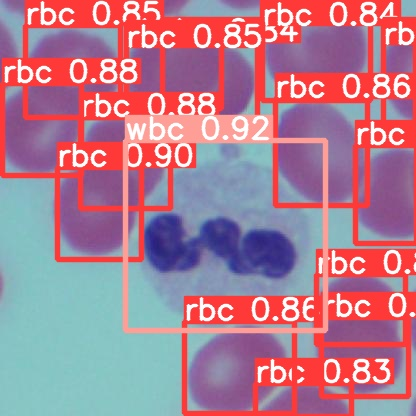

In [32]:
display.Image(filename='/Users/thesuperchee/Documents/YOLO/yolov5/runs/detect/exp4/image-31_png.rf.f70db72fb0f995b3dd5a4bc3d5a5c67d.jpg', width=600)